# Lista 2

### Zaimplementowane biblioteki

In [11]:
import random
import tracemalloc
import time
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import os

### Zadanie 1

[-9, -29, 2, 38, -27, -4, 43, 46, -2, -4, -3, -17, 14, 9, -27], Largest element is 46
Memory allocated is 16.22kB


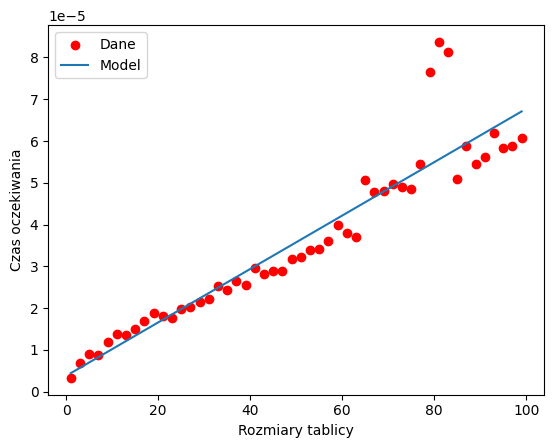

Nasza funkcja ma zlozonosc O(n)


In [2]:
def findbiggest(s):
    if len(s) == 1:
        return s[0]
    while len(s) > 1:
        if s[0] >= s[1]:
            s.pop(1)
            return findbiggest(s)
        else:
            s.pop(0)
            return findbiggest(s)

tracemalloc.start()

s = [random.randint(-50, 50) for i in range(15)]
print(f"{s}, Largest element is {findbiggest(s)}")

current, peak = tracemalloc.get_traced_memory()

print(f"Memory allocated is {peak/1024:.2f}kB")


times = []
sizes = [i for i in range(1, 100, 2)]

for i in sizes:
    s = [random.randint(-50, 50) for i in range(i)]

    start = time.perf_counter()
    findbiggest(s)
    stop = time.perf_counter()

    times.append(stop-start)

def func(x,a,b):
    return a*x + b

popt, pcov = curve_fit(func, sizes, times)
a, b = popt[0], popt[1]
xs = np.arange(1, 100)

plt.scatter(sizes, times, c='r', label='Dane')
plt.plot(xs, func(xs, a, b), label='Model')
plt.xlabel('Rozmiary tablicy')
plt.ylabel('Czas oczekiwania')
plt.legend()
plt.show()

print('Nasza funkcja ma zlozonosc O(n)')

### Zadanie 3

In [5]:
def minmax_rec(S):
    if len(S) == 2:
        if S[0] > S[1]:
            return [S[0], S[1]]
        else:
            return [S[1], S[0]]

    first_el, next_el = S[0], minmax_rec(S[1:])
    if first_el > next_el[0]:
        return [first_el, next_el[1]]   #zwracanie wiekszego elementu z trzech ostatnich liczb
    if first_el < next_el[1]:
        return [next_el[0], first_el]   #zwracanie mniejszego elementu z trzech ostatnich liczb
    else:
        return next_el                  #trzeci od konca jest mniejszy od najwiekszego i wiekszy od najmniejszego

S = [random.randint(-20, 20) for i in range(random.randint(2, 20))]

print(S)
print(minmax_rec(S))

[-14, 13, -16, 12, 5, -18, 9, 20, -3, -5]
[20, -18]


### Zadanie 4

In [7]:
def product(a,b):
    if b == 0:
        return 0
    else:
        return a+product(a, b-1)
print(product(5,4))

20


### Zadanie 5

In [10]:
def palindrome(text):
    redacted = [letter for letter in text if letter.isalnum()]

    if len(redacted) <= 2:
        if len(redacted) == 1:
            return True
        elif redacted[0] == redacted[1]:
            return True
        else:
            return False
    
    inner = palindrome(redacted[1:-1])

    if (redacted[0] == redacted[-1]) and inner:
        return True
    else:
        return False
    

print(palindrome("abc,def fedc,,b,a"))
print(palindrome("abbab"))

True
False


### Zadanie 6

In [ ]:
paths = []

def find(path, filename):
    if os.path.isdir(path):
        for file in os.listdir(path):
            if  file == filename:
                paths.append(os.path.join(path, file))
            else:
                childpath = os.path.join(path, file)
                find(childpath, filename)
    return paths

print(find("path","filename"))